In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import tensorflow as tf

### EDA

Pull in data.

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Descriptive statistics.

In [3]:
round(data.describe(), 2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Feature distributions.

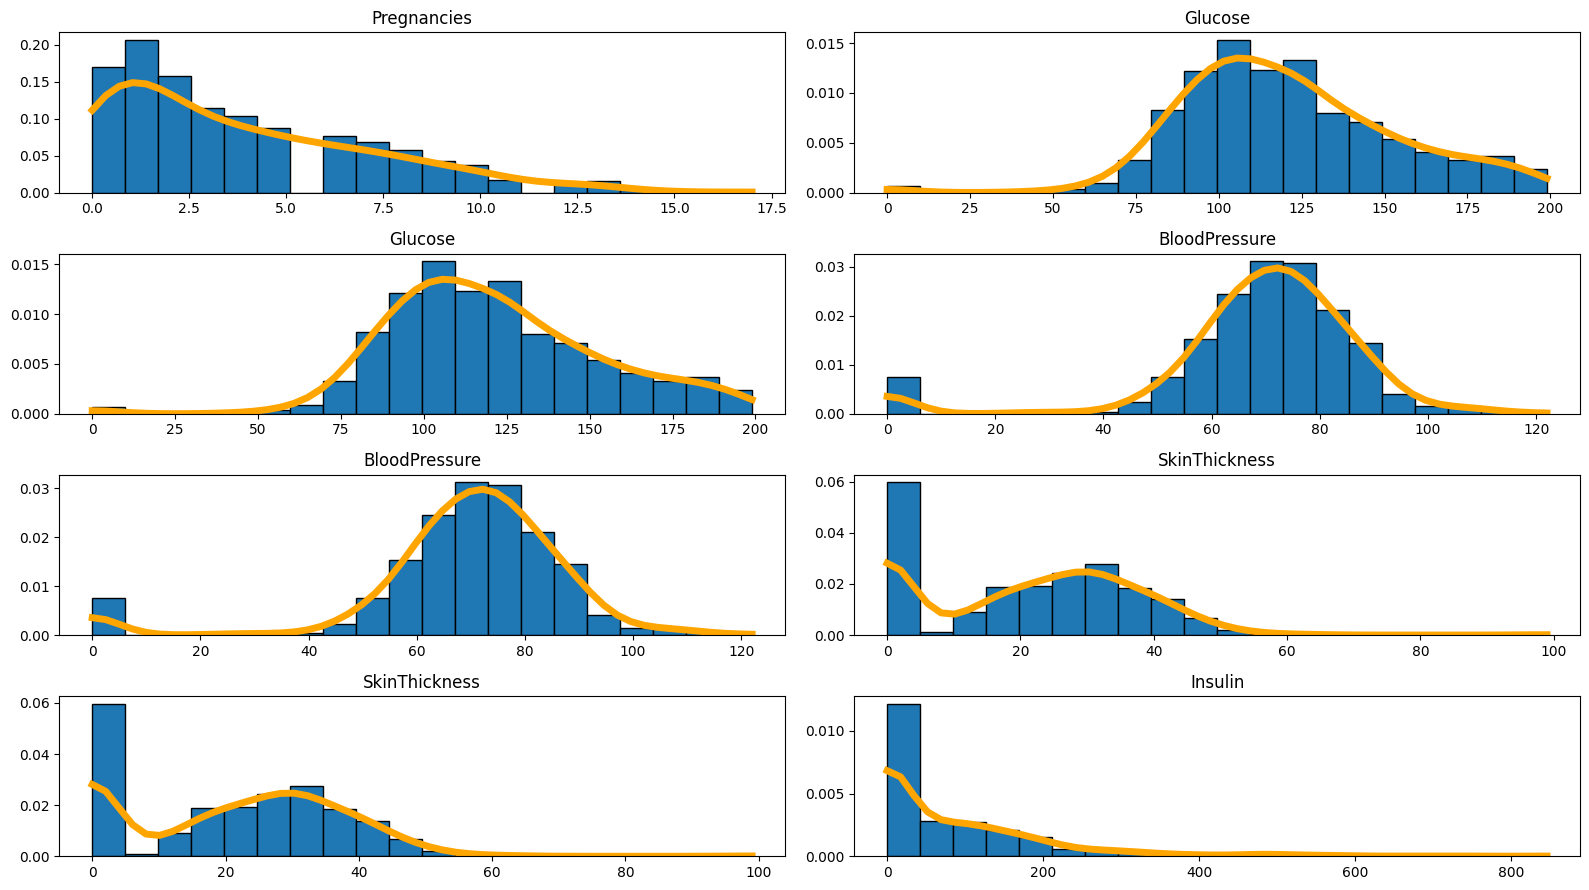

In [4]:
fig, axs = plt.subplots(4, 2, figsize=[16,9])

for i in range(4):
    for j in range(2):
        col = data.iloc[:,i + j]
        
        axs[i][j].hist(col, bins=20, edgecolor='black', density=True)
        
        x = ss.gaussian_kde(col)
        lin = np.linspace(col.min(), col.max(), 50)
        
        axs[i][j].plot(lin, x(lin), color='orange', linewidth=5)
        axs[i][j].set_title(col.name)
        
fig.tight_layout()
plt.show()

Outcome is the target label we are trying to predict. We see that roughly a third of the patients in the data set have a positive diabetes test.

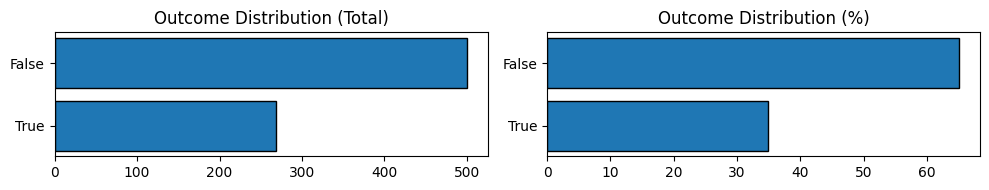

In [5]:
fig, axs = plt.subplots(1, 2, figsize=[10,2])

axs[0].barh([0, 1], [(data['Outcome'] == True).sum(), (data['Outcome'] == False).sum()], edgecolor='Black')
axs[1].barh([0, 1], [100 * (data['Outcome'] == True).sum() / len(data), 100 * (data['Outcome'] == False).sum() / len(data)], edgecolor='Black')
axs[0].set_yticks([0, 1], labels=['True', 'False'])
axs[1].set_yticks([0, 1], labels=['True', 'False'])
axs[0].set_title('Outcome Distribution (Total)')
axs[1].set_title('Outcome Distribution (%)')
fig.tight_layout()
plt.show()

### Data Cleaning

In [6]:
X = data.drop(columns=['Outcome'])
y = data[['Outcome']]

We will split the data into a training set (60%), a test set (20%), and a validation set (20%).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=11)

### Model Fitting

We will be using TensorFlow to implement our neural network model. Our model will use two hidden layers that both have a relu activation functions and then an output layer that uses the sigmoid function. We use the sigmoid function in the output layer because we are performing a classification exercise.

In [8]:
def create_model(learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(8,)))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(4, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    #optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)     # Use .legacy version on M1/M2 Macs
    loss = tf.keras.losses.BinaryCrossentropy()

    model.compile(loss=loss, optimizer=optimizer)

    return model

In [66]:
def process_data(X):
    normalize = tf.keras.layers.Normalization(axis=1)
    normalize.adapt(X)
    X_norm = normalize(X)

    return X_norm

In [67]:
X_train_norm = process_data(X_train)
X_val_norm = process_data(X_val)

In [11]:
learning_rate=.1
model = create_model(learning_rate)
model.fit(X_train_norm, y_train, epochs=25, batch_size=10)

Epoch 1/25
46/46 [==============================] - 0s 429us/step - loss: 0.5993
Epoch 2/25
46/46 [==============================] - 0s 419us/step - loss: 0.5459
Epoch 3/25
46/46 [==============================] - 0s 337us/step - loss: 0.5349
Epoch 4/25
46/46 [==============================] - 0s 380us/step - loss: 0.4885
Epoch 5/25
46/46 [==============================] - 0s 376us/step - loss: 0.4790
Epoch 6/25
46/46 [==============================] - 0s 388us/step - loss: 0.5081
Epoch 7/25
46/46 [==============================] - 0s 367us/step - loss: 0.5064
Epoch 8/25
46/46 [==============================] - 0s 370us/step - loss: 0.4807
Epoch 9/25
46/46 [==============================] - 0s 371us/step - loss: 0.4763
Epoch 10/25
46/46 [==============================] - 0s 379us/step - loss: 0.4601
Epoch 11/25
46/46 [==============================] - 0s 327us/step - loss: 0.4736
Epoch 12/25
46/46 [==============================] - 0s 328us/step - loss: 0.4513
Epoch 13/25
46/46 [======

Here are the different hyperparameter values that we will optimize the model to.

In [47]:
parameters = {'learning_rate' : [.5, .3, .1, .01, .001],
              'epochs' : [25, 50, 100, 150],
              'batch_size' : [0.0, 0.05, 0.1, 0.2, 0.3, 0.4]
}

We run a grid search to find the best hyperparameters. We will evaluate a model's fit by its accuracy on our validation set.

In [77]:
train_losses = {}
val_losses = {}

total = 1
for i in parameters.values():
    total *= len(i)

print('Models Fitted: %d/%d (%.2f%%)' % (0, total, 0), end='\r')
count = 1
for learning_rate in parameters['learning_rate']:
    for epochs in parameters['epochs']:
        for batch_size in parameters['batch_size']:            
            model = create_model(learning_rate)
            # model.fit(X_train_norm, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
            model.fit(X_train_norm,
                      y_train,
                      epochs=epochs,
                      batch_size=int(batch_size * len(X_train_norm)),
                      validation_data=(X_val_norm, y_val),
                      verbose=0)

            # val_pred = model.predict(X_val, verbose=0)
            # val_pred = val_pred > 0.5
            # score = val_pred == y_val

            # score = model.history.history['val_loss'][-1]

            # scores.update({(learning_rate, epochs, batch_size) : score.sum() / len(score)})
            train_losses.update({(learning_rate, epochs, batch_size) : model.history.history['loss'][-1]})
            val_losses.update({(learning_rate, epochs, batch_size) : model.history.history['val_loss'][-1]})

            print('Models Fitted: %d/%d (%.2f%%)' % (count, total, 100 * count / total), end='\r')
            count += 1

In [90]:
results = pd.DataFrame({'train_loss' : train_losses, 'val_loss' : val_losses})
results = results.reset_index()
results.columns = ['learning_rate', 'epochs', 'batch_size', 'train_score', 'val_score']
results = results.sort_values('val_score', ascending=True)
results.head()

,learning_rate,epochs,batch_size,train_score,val_score
29,0.300,25,184,0.440548,0.469550
96,0.001,25,0,0.446611,0.489915
111,0.001,100,92,0.439332,0.494131
112,0.001,100,138,0.427892,0.495819
119,0.001,150,184,0.439387,0.502837


In [50]:
print('Our best model has the following parameters')

for key, value in round(results.iloc[0][:3], 2).to_dict().items():
    print(key, '=', value)

Our best model has the following parameters
learning_rate = 0.5
epochs = 25.0
batch_size = 0.0


We have the best hyperparameters from the grid search. We create a fresh model with those hyperparameters and train it on our training data.

In [68]:
model = create_model(results.iloc[0]['learning_rate'])
model.fit(X_train_norm,
          y_train,
          epochs=int(results.iloc[0]['epochs']),
          batch_size=int(results.iloc[0]['batch_size'] * len(X_train_norm)),
          validation_data=(X_val_norm, y_val))

Epoch 1/25
15/15 [==============================] - 0s 5ms/step - loss: 0.7601 - val_loss: 0.6101
Epoch 2/25
15/15 [==============================] - 0s 1ms/step - loss: 0.6561 - val_loss: 0.6099
Epoch 3/25
15/15 [==============================] - 0s 1ms/step - loss: 0.6574 - val_loss: 0.6336
Epoch 4/25
15/15 [==============================] - 0s 1ms/step - loss: 0.6584 - val_loss: 0.6492
Epoch 5/25
15/15 [==============================] - 0s 1ms/step - loss: 0.6611 - val_loss: 0.6156
Epoch 6/25
15/15 [==============================] - 0s 1ms/step - loss: 0.6508 - val_loss: 0.6102
Epoch 7/25
15/15 [==============================] - 0s 1ms/step - loss: 0.6687 - val_loss: 0.6307
Epoch 8/25
15/15 [==============================] - 0s 1ms/step - loss: 0.6658 - val_loss: 0.6459
Epoch 9/25
15/15 [==============================] - 0s 1ms/step - loss: 0.6509 - val_loss: 0.6113
Epoch 10/25
15/15 [==============================] - 0s 1ms/step - loss: 0.6524 - val_loss: 0.6099
Epoch 11/25
15/15 [

In [74]:
model.history.history['val_loss'][-1]

0.6398509740829468

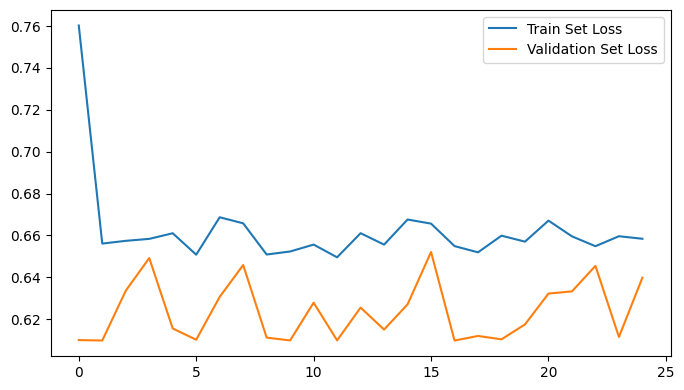

In [70]:
plt.figure(figsize=[8,4.5])
plt.plot(model.history.history['loss'], label='Train Set Loss')
plt.plot(model.history.history['val_loss'], label='Validation Set Loss')
plt.legend()
plt.show()

Below is an example of one of our trees.

In [ ]:
# This cell needs graphviz to be installed
fig, ax = plt.subplots(figsize=(8, 4.5))
plot_tree(model, num_trees=9, ax=ax)
plt.show()

We will assume that a prediction probability of 0.5 or greater is classified as True and anything else as False.

In [ ]:
preds_test = model.predict_proba(X_test)
results_test = pd.DataFrame({'Target' : np.array(y_test).T[0], 'True Prob' : preds_test[:,1], 'False Prob' : preds_test[:,0]})
results_test['Target'] = results_test['Target'].astype(bool)
results_test['Prediction'] = results_test['True Prob'] >= .5
results_test['Correct'] = results_test['Target'] == results_test['Prediction']
results_test.head()

In [ ]:
a = 100 * results_test[results_test['Target'] == True]['Correct'].sum() / len(results_test[results_test['Target'] == True])
print('Guessed Test True Correctly %.2f%%' % a)
b = 100 * results_test[results_test['Target'] == False]['Correct'].sum() / len(results_test[results_test['Target'] == False])
print('Guessed Test False Correctly %.2f%%' % b)
c = 100 * results_test['Correct'].sum() / len(results_test)
print('Guessed Test Correctly %.2f%%' % c)

In [ ]:
preds_train = model.predict_proba(X_train)
results_train = pd.DataFrame({'Target' : np.array(y_train).T[0], 'True Prob' : preds_train[:,1], 'False Prob' : preds_train[:,0]})
results_train['Target'] = results_train['Target'].astype(bool)
results_train['Prediction'] = results_train['True Prob'] >= .5
results_train['Correct'] = results_train['Target'] == results_train['Prediction']
results_train.head()

In [ ]:
a = 100 * results_train[results_train['Target'] == True]['Correct'].sum() / len(results_train[results_train['Target'] == True])
print('Guessed Train True Correctly %.2f%%' % a)
b = 100 * results_train[results_train['Target'] == False]['Correct'].sum() / len(results_train[results_train['Target'] == False])
print('Guessed Train False Correctly %.2f%%' % b)
c = 100 * results_train['Correct'].sum() / len(results_train)
print('Guessed Train Correctly %.2f%%' % c)

We see that our model predicts better on our training data than on our test data, which is expected. However, the model is still able to predict diabetes correctly in +70% of our test instances, which is a reasonable result.

In [ ]:
preds_val = model.predict_proba(X_val)
results_val = pd.DataFrame({'Target' : np.array(y_val).T[0], 'True Prob' : preds_val[:,1], 'False Prob' : preds_val[:,0]})
results_val['Target'] = results_val['Target'].astype(bool)
results_val['Prediction'] = results_val['True Prob'] >= .5
results_val['Correct'] = results_val['Target'] == results_val['Prediction']

Here we look at the ROC Curve. If our curve was simply a straight diagonal line $(y=x)$, our model would have no predictive power, i.e. when the threshold of predicting a positive result vs. a negative result is raised our model's performance improves linearly. But we see that this is not the case for any of our three sets, so our model does have predictive power.

In [ ]:
train_roc = roc_curve(results_train['Target'], results_train['True Prob'])
val_roc = roc_curve(results_val['Target'], results_val['True Prob'])
test_roc = roc_curve(results_test['Target'], results_test['True Prob'])

plt.figure(figsize=[8,4.5])
plt.plot(train_roc[0], train_roc[1], label='Train ROC')
plt.plot(val_roc[0], val_roc[1], label='Validation ROC')
plt.plot(test_roc[0], test_roc[1], label='Test ROC')
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Next we look at our Confusion Matrix. We can see that when we predict negative, we get a true negative about 70% of the time and a false negative about 30% of the time. When we predict positive, we get a false positive about 25% of the time and a true positive about 75% of the time. This is a balanced model because our false positive rate and our false negative rate are about the same.

In [ ]:
conf_mat = confusion_matrix(results_test['Target'], results_test['Prediction'], normalize='pred')
conf_mat = pd.DataFrame(conf_mat)
conf_mat.columns = pd.MultiIndex.from_tuples([('Predicted Values', 'Negative'), ('Predicted Values', 'Positive')])
conf_mat.index = pd.MultiIndex.from_tuples([('Actual Values', 'Negative'), ('Actual Values', 'Positive')])
round(conf_mat * 100, 2).astype(str) + '%'